In [29]:
import pandas as pd
import numpy as np

fish_data = pd.read_csv("https://bit.ly/fish_csv_data")

In [30]:
input = fish_data[['Weight', 'Length', 'Diagonal', 'Width']]
target = fish_data[['Height']]

In [31]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(input, target, random_state=46)

In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(np.round(ridge.score(train_scaled, train_target), 3))
print(np.round(ridge.score(test_scaled, test_target), 3))

0.826
0.808


In [34]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [35]:
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

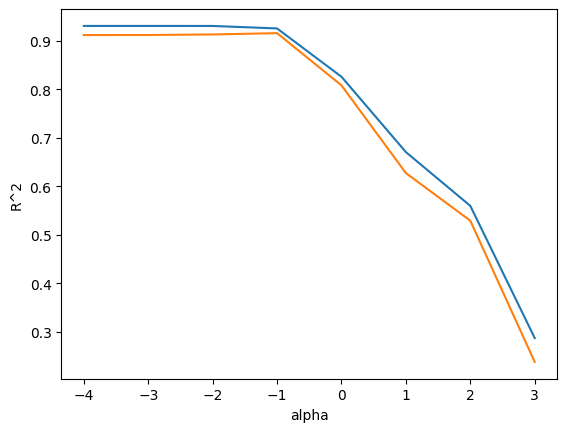

In [36]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [40]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(np.round(ridge.score(train_scaled, train_target), 3))
print(np.round(ridge.score(test_scaled, test_target), 3))

0.926
0.916


In [86]:
fish_data = pd.read_csv("https://bit.ly/fish_csv_data")

In [87]:
fish_indexes = fish_data[(fish_data['Species'] == 'Bream')| (fish_data['Species'] == 'Perch')]

In [88]:
input = fish_indexes[['Weight', 'Length', 'Diagonal', 'Width']]
target = fish_indexes[['Species']]

In [89]:
train_input, test_input, train_target, test_target = train_test_split(input, target, test_size = 0.23, random_state=48)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [90]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)

print(np.round(kn.score(train_scaled, train_target), 2))
print(np.round(kn.score(test_scaled, test_target), 2))

0.91
0.95


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [91]:
train_input, test_input, train_target, test_target = train_test_split(input, target, test_size = 0.5, random_state=48)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [92]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)

print(np.round(kn.score(train_scaled, train_target), 2))
print(np.round(kn.score(test_scaled, test_target), 2))

0.96
0.83


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [139]:
fish_data = pd.read_csv("https://bit.ly/fish_csv_data")

In [140]:
input = fish_data[['Length', 'Diagonal', 'Height']]
target = fish_data[['Weight']]

In [141]:
train_input, test_input, train_target, test_target = train_test_split(input, target, random_state=45)

In [142]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

In [143]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [144]:
feature_names = poly.get_feature_names_out(['Length', 'Diagonal', 'Height'])

In [145]:
coef = lr.coef_
intercept = lr.intercept_

In [147]:
poly.get_feature_names_out()

array(['1', 'Length', 'Diagonal', 'Height', 'Length^2', 'Length Diagonal',
       'Length Height', 'Diagonal^2', 'Diagonal Height', 'Height^2'],
      dtype=object)

In [148]:
print(np.round(coef, 3))

[[  0.      2.307 -31.768  15.47   14.591 -30.161  16.814  15.828 -13.058
   -2.308]]


In [113]:
print(np.round(intercept, 3))

[224.805]


In [116]:
print(np.round(lr.score(train_poly, train_target), 3))
print(np.round(lr.score(test_poly, test_target), 3))

0.979
0.963


In [126]:
fish_data = pd.read_csv("https://bit.ly/fish_csv_data")

In [131]:
fish_indexes = fish_data[(fish_data['Species'] == 'Bream') | (fish_data['Species'] == 'Parkki') | (fish_data['Species'] == 'Perch') | (fish_data['Species'] == 'Pike') | (fish_data['Species'] == 'Roach') | (fish_data['Species'] == 'Smelt')| (fish_data['Species'] == 'Whitefish')]

In [132]:
input = fish_indexes[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
target = fish_indexes[['Species']]

In [133]:
train_input, test_input, train_target, test_target = train_test_split(input, target, test_size = 0.3, random_state=42)

In [134]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [135]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=25)
lr.fit(train_scaled, train_target)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=25)

In [137]:
print(lr.predict(test_scaled[2:3]))
print(np.round(lr.predict_proba(test_scaled[2:3]),2))

['Pike']
[[0.   0.   0.03 0.93 0.01 0.03 0.  ]]


In [138]:
print(lr.predict(test_scaled[17:18]))
print(np.round(lr.predict_proba(test_scaled[17:18]),2))

['Perch']
[[0.   0.   0.8  0.01 0.18 0.   0.01]]
